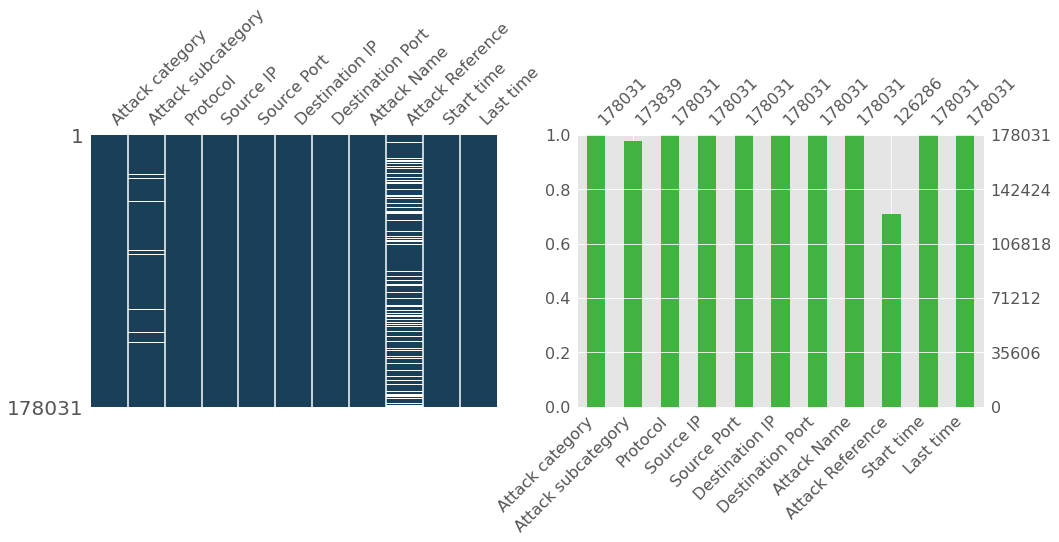

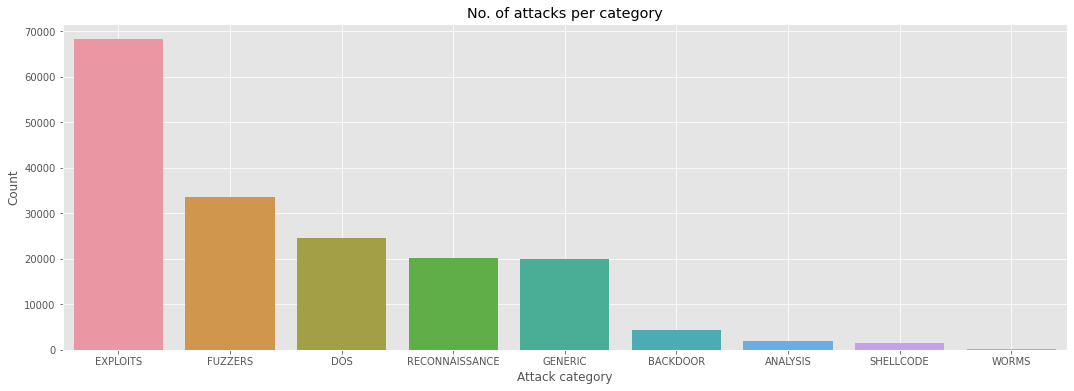

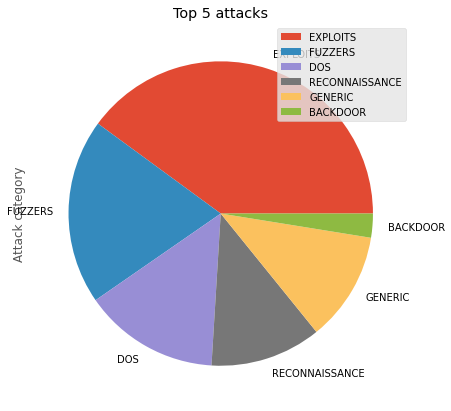

p-value in T-test 0.0


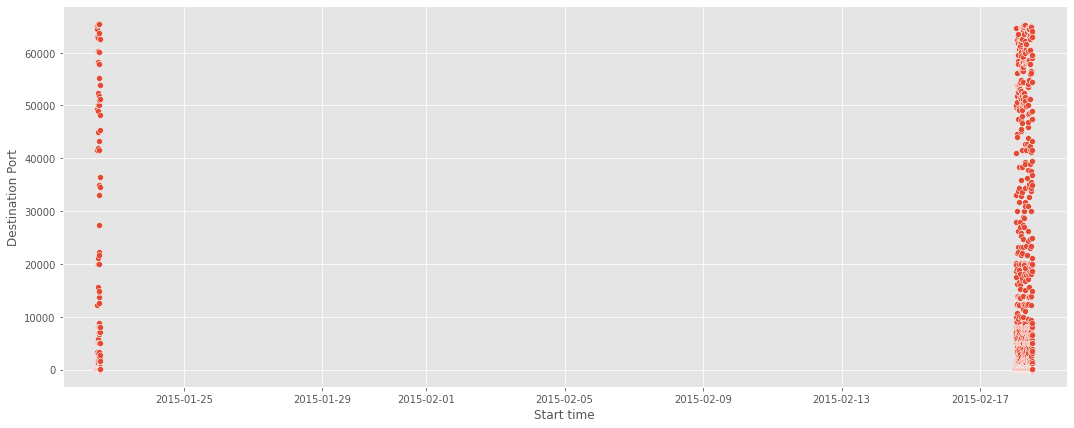

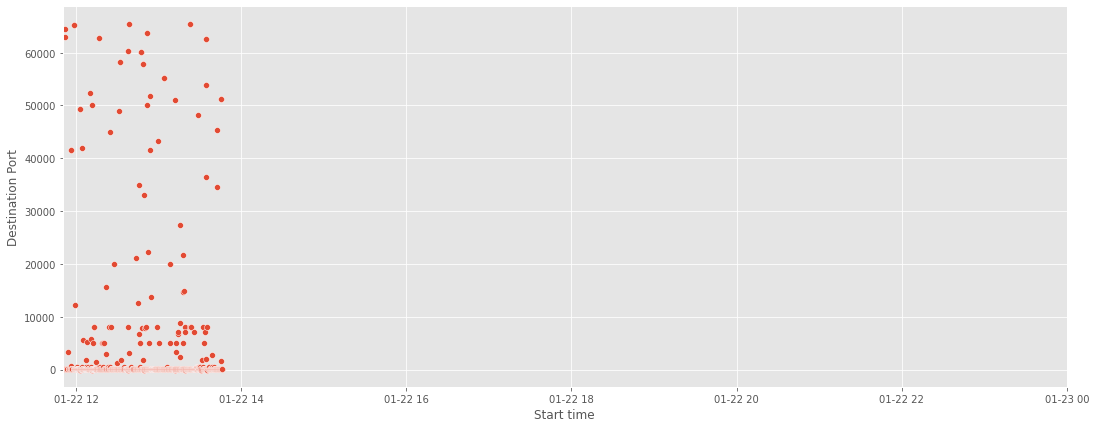

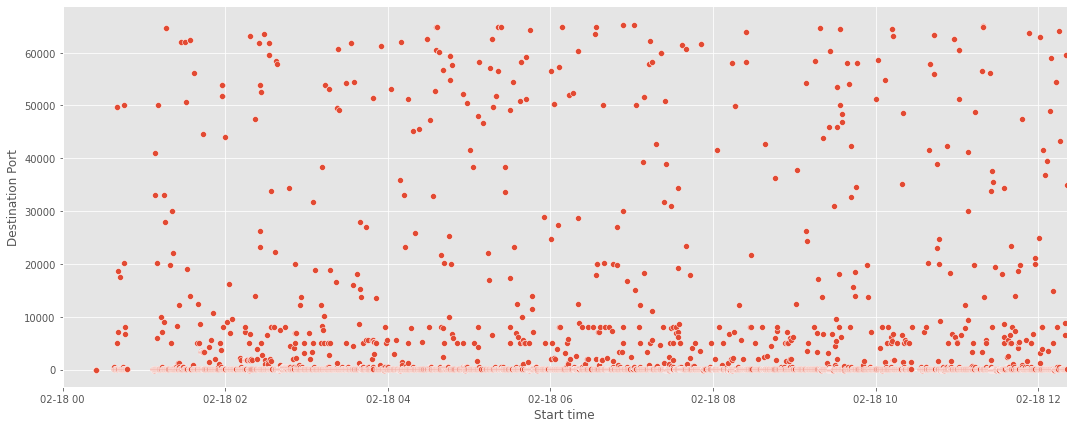

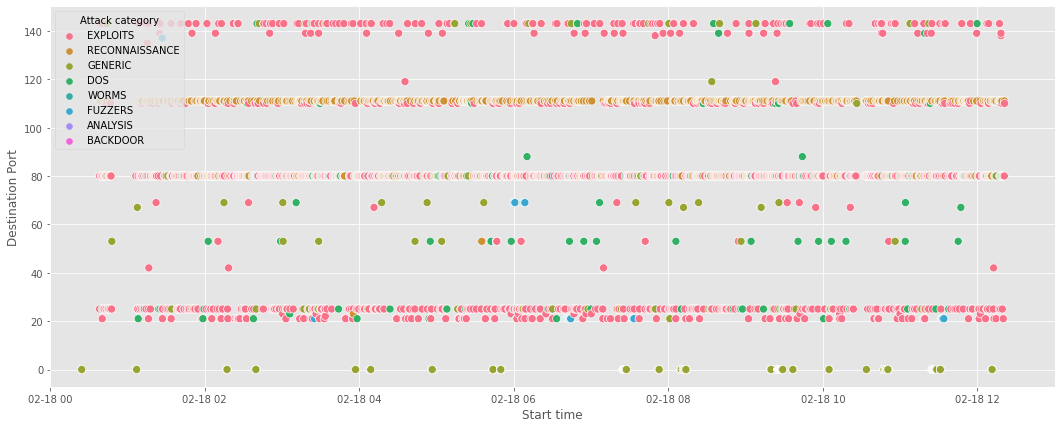

In [ ]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
import ipaddress;
from scipy import stats;
from datetime import datetime,timedelta;
from scipy.stats import chi2_contingency;
import math;
import missingno as msno;
import warnings;
warnings.filterwarnings('ignore');
plt.style.use('ggplot')

df=pd.read_csv('Cybersecurity_attacks.csv')


df[['Start time','Last time']]=df['Time'].str.split('-',expand=True)

df=df.drop(['.','Time'],axis=1)

df.head()

figure,(ax1,ax2)=plt.subplots(1,2,figsize=(16,5))
msno.matrix(df,ax=ax1,sparkline=False,color=(0.1,0.25,0.35))
msno.bar(df,ax=ax2,color=(0.25,0.7,0.25))
plt.show()


df['Attack category']=df['Attack category'].fillna('Not Registered')

df=df.drop(df[df.duplicated()].index)

invalid_SP=( (df['Source Port']<0) | (df['Source Port']>65535))
invalid_DP=( (df['Destination Port']<0) | (df['Destination Port']>65535))
df[invalid_DP | invalid_SP ]

df=df[~(invalid_DP | invalid_SP) ].reset_index(drop=True)
df.shape

df['Protocol'].unique()
df['Attack category'].unique()

df['Protocol']=df['Protocol'].str.upper().str.strip()
df['Attack category']=df['Attack category'].str.upper().str.strip()
df['Attack category']=df['Attack category'].str.strip().replace('BACKDOORS','BACKDOOR')

df[pd.isnull(df['Attack Reference'])].shape

# print(df[pd.isnull(df['Attack Reference'])]['Attack category'].value_counts())

# print(df['Attack category'].value_counts())

# print(((df[pd.isnull(df['Attack Reference'])]['Attack category'].value_counts()/df['Attack category'].value_counts())*100).dropna().sort_values(ascending=False))

tcp_ports=pd.read_csv('TCP-ports.csv')
tcp_ports['Service']=tcp_ports['Service'].str.upper()
tcp_ports.head()

newdf=pd.merge(df,tcp_ports[['Port','Service']],left_on='Destination Port', right_on='Port', how='left')

newdf=newdf.rename(columns={"Service":"Destination Port Service"})

newdf=newdf.drop(columns='Port')
newdf.head()


newdf['Attack category'].value_counts()*100/newdf['Attack category'].value_counts().sum()

plt.figure(figsize=(18,6))
x=sns.barplot(x=newdf['Attack category'].value_counts().index,y=newdf['Attack category'].value_counts())
plt.xlabel('Attack category')
plt.ylabel('Count')
plt.title('No. of attacks per category')
plt.grid(True)

a=pd.DataFrame(newdf['Attack category'].value_counts())[:6]
a.plot(kind='pie',subplots=True,figsize=(7,7))
plt.title('Top 5 attacks')
plt.legend(loc="left")
plt.show()


newdf['Start time']=pd.to_datetime(newdf['Start time'],unit='s')
newdf['Last time']=pd.to_datetime(newdf['Last time'],unit='s')
newdf['Duration']=((newdf['Last time'] - newdf['Start time']).dt.seconds).astype(int)

newdf['Start time'].astype(str).str.split(' ').str[0].unique()
newdf.describe()

statistics,pvalue=stats.ttest_ind(newdf['Source Port'],newdf['Destination Port'],equal_var=False)

print('p-value in T-test '+ str(pvalue))

newdf.corr(method='pearson')

newdf.corr(method='spearman')


df_dummies=pd.get_dummies(newdf,columns=['Attack category'])

# plt.figure(figsize=(18,7))
# sns.heatmap(df_dummies.corr(method='pearson'),annot=True,vmin=-1.0,vmax=1.0 ,cmap=sns.color_palette('RdBu_r',15))
# plt.show()

# plt.figure(figsize=(18,7))
# sns.heatmap(df_dummies.corr(method='spearman'),annot=True,vmin=-1.0,vmax=1.0 ,cmap=sns.color_palette('RdBu_r',15))
# plt.show()

# g=sns.pairplot(newdf)
# g.fig.set_size_inches(11,7)
# plt.show()

newdf['Destination IP'].value_counts()[:5]

plt.figure(figsize=(18,7))
sns.scatterplot(x=newdf[newdf['Destination IP']=='149.171.126.17']['Start time'], y=newdf[newdf['Destination IP']=='149.171.126.17']['Destination Port'])
plt.xlim(left=newdf['Start time'].min()-timedelta(days=1),right=newdf['Start time'].max()+timedelta(days=1))
plt.grid(True)
plt.show()

plt.figure(figsize=(18,7))
sns.scatterplot(x=newdf[newdf['Destination IP']=='149.171.126.17']['Start time'], y=newdf[newdf['Destination IP']=='149.171.126.17']['Destination Port'])
plt.xlim(left=newdf['Start time'].min(),right=datetime.strptime('15-01-23', '%y-%m-%d'))
plt.grid(True)
plt.show()

plt.figure(figsize=(18,7))
sns.scatterplot(x=newdf[newdf['Destination IP']=='149.171.126.17']['Start time'], y=newdf[newdf['Destination IP']=='149.171.126.17']['Destination Port'])
plt.xlim(left=datetime.strptime('15-02-18', '%y-%m-%d'),right=newdf['Start time'].max())
plt.grid(True)
plt.show()

plt.figure(figsize=(18,7))
sns.scatterplot(x='Start time', y='Destination Port', hue='Attack category', 
                data=newdf[(newdf['Destination IP']=='149.171.126.17')&(newdf['Destination Port']<=150)], 
                s=65)
plt.xlim(left=datetime.strptime('15-02-18 00:00:00', '%y-%m-%d %H:%M:%S'),
         right=datetime.strptime('15-02-18 13:00:00', '%y-%m-%d %H:%M:%S'))
plt.grid(True)
plt.show()